In [ ]:
'''
Data 201
Group Project: Aminata Diatta, Annet Isa, Joshua Shleifer.
Project 2
'''

'\nData 201\nGroup Project: Aminata Diatta, Annet Isa, Joshua Shleifer.\nProject 2\n'

#**Introduction**

From the dataset page at the UC Irvine Machine Learning Repositry page:

"The National Health and Nutrition Examination Survey (NHANES), administered by the Centers for Disease Control and Prevention (CDC), collects extensive health and nutritional information from a diverse U.S. population. Though expansive, the dataset is often too broad for specific analytical purposes. In this sub-dataset, we narrow our focus to predicting respondents' age by extracting a subset of features from the larger NHANES dataset. These selected features include physiological measurements, lifestyle choices, and biochemical markers, which were hypothesized to have strong correlations with age."
https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset

There are 10 columns, 2,278 rows.

Raw csv file: https://drive.google.com/file/d/1V87ry830Y9dNKjSvq-u-43C173PhRgrU/view?usp=drive_link


dataframe for EDA: df

pandas dataframe for Linear Regression: nhanes_data


Preliminary question:
Can we predict a respondent's age using the dataset?
Follow up question if we had a LOT more time: using similar data from each year, could we show that the age of seniority is increasing over time? Is 75 the new 65?



#Data Preparation and Wrangling






In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
nhanes_data = fetch_ucirepo(id=887)

# data (as pandas dataframes)
X = nhanes_data.data.features
y = nhanes_data.targets


# metadata
print(nhanes_data.metadata)

# variable information
print(nhanes_data.variables)


{'uci_id': 887, 'name': 'National Health and Nutrition Health Survey 2013-2014 (NHANES) Age Prediction Subset', 'repository_url': 'https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset', 'data_url': 'https://archive.ics.uci.edu/static/public/887/data.csv', 'abstract': "The National Health and Nutrition Examination Survey (NHANES), administered by the Centers for Disease Control and Prevention (CDC), collects extensive health and nutritional information from a diverse U.S. population. Though expansive, the dataset is often too broad for specific analytical purposes. In this sub-dataset, we narrow our focus to predicting respondents' age by extracting a subset of features from the larger NHANES dataset. These selected features include physiological measurements, lifestyle choices, and biochemical markers, which were hypothesized to have strong correlations with age.", 'area': 'Health and Medicine', 'tasks': ['Classifi

In [ ]:
# importing the raw data to create a dataframe for EDA

import numpy as np
import pandas as pd

df = pd.read_csv("NHANES_age_prediction.csv")

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB
None
      SEQN age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  \
0  73564.0     Adult      61.0       2.0     2.0    35.7   110.0     2.0   
1  73568.0     Adult      26.0       2.0     2.0    20.3    89.0     2.0   
2  73576.0     Adult      16.0       1.0     2.0    23.2    89.0     2.0   
3  73577.0     Adult      32.0       1.0     2.0  

In [ ]:
df.rename(columns={'RIDAGEYR': 'AGE', 'RIAGENDR': 'GENDER', 'PAQ605': 'PHYSICAL ACTIVITIES', 'BMXBMI' : 'BODY MASS INDEX', 'LBXGLU' : 'BLOOD GLUCOSE AFTER FASTING', 'DIQ010' : 'DIABETIC?', 'LBXGLT': 'ORAL', 'LBXIN' : 'BLOOD INSULIN LEVEL'}, inplace=True)
print("\nRenamed DataFrame (Specific Columns):")
print(df)


Renamed DataFrame (Specific Columns):
         SEQN age_group   AGE  GENDER  PHYSICAL ACTIVITIES  BODY MASS INDEX  \
0     73564.0     Adult  61.0     2.0                  2.0             35.7   
1     73568.0     Adult  26.0     2.0                  2.0             20.3   
2     73576.0     Adult  16.0     1.0                  2.0             23.2   
3     73577.0     Adult  32.0     1.0                  2.0             28.9   
4     73580.0     Adult  38.0     2.0                  1.0             35.9   
...       ...       ...   ...     ...                  ...              ...   
2273  83711.0     Adult  38.0     2.0                  2.0             33.5   
2274  83712.0     Adult  61.0     1.0                  2.0             30.0   
2275  83713.0     Adult  34.0     1.0                  2.0             23.7   
2276  83718.0     Adult  60.0     2.0                  2.0             27.4   
2277  83727.0     Adult  26.0     1.0                  2.0             24.5   

      BLOOD 

In [ ]:
# additional context for specific columns
df['gender_copy'] = df['GENDER'].copy()
df['gender_copy'] = df['gender_copy'].replace({1.0: 'M', 2.0: 'F'})

df['diabetes_copy'] = df['DIABETIC?'].copy()
df['diabetes_copy'] = df['diabetes_copy'].replace({1.0: 'Yes', 2.0: 'No', 3.0: 'Borderline'})

df['work_activity_copy'] = df['PHYSICAL ACTIVITIES'].copy()
df['work_activity_copy'] = df['work_activity_copy'].replace({1.0: 'YES', 2.0: 'NO'})

df.head(10)


,SEQN,age_group,AGE,GENDER,PHYSICAL ACTIVITIES,BODY MASS INDEX,BLOOD GLUCOSE AFTER FASTING,DIABETIC?,ORAL,BLOOD INSULIN LEVEL,gender_copy,diabetes_copy,work_activity_copy
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,F,No,NO
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,F,No,NO
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,M,No,NO
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15,M,No,NO
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,F,No,YES
5,73581.0,Adult,50.0,1.0,2.0,23.6,110.0,2.0,100.0,6.08,M,No,NO
6,73587.0,Adult,14.0,1.0,2.0,38.7,94.0,2.0,202.0,21.11,M,No,NO
7,73596.0,Adult,57.0,2.0,2.0,38.3,107.0,2.0,164.0,20.93,F,No,NO
8,73607.0,Senior,75.0,1.0,2.0,38.9,89.0,2.0,113.0,17.47,M,No,NO
9,73610.0,Adult,43.0,1.0,1.0,28.9,90.0,2.0,95.0,3.24,M,No,YES


#EDA Visualisation 1

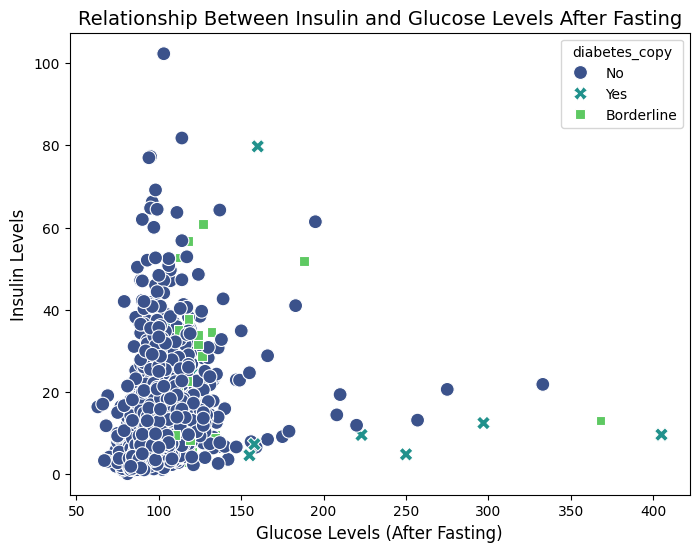

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))

# Plotting glucose levels vs. insulin levels
data = df
sns.scatterplot(
    data=data,
    x='BLOOD GLUCOSE AFTER FASTING',
    y='BLOOD INSULIN LEVEL',
    hue='diabetes_copy',
    palette='viridis',
    style='diabetes_copy',
    s=100
    )

# Step 3: Add labels and a title
plt.xlabel("Glucose Levels (After Fasting)", fontsize=12)
plt.ylabel("Insulin Levels", fontsize=12)
plt.title("Relationship Between Insulin and Glucose Levels After Fasting", fontsize=14)

# Show the plot
plt.show()

## Analyze  
When we look at the graph, we can see how insulin levels change based on glucose levels. From the dots, we observe that when glucose levels reach around 100, insulin levels begin to increase. However, when glucose levels exceed 200, the pattern becomes less clear. For instance, at a glucose level of 250, the insulin level is only 20. This suggests some uncertainty in how insulin behaves at higher glucose levels.

## Interpretation:
Diabetes affects how the body regulates glucose and insulin levels. For people with diabetes, insulin plays a crucial role in managing blood sugar levels. When glucose levels rise, insulin levels typically increase as the body attempts to regulate blood sugar. However, individuals with diabetes may experience difficulties in this regulation.

Fasting can lead to blood sugar fluctuations:

**Hypoglycemia** (low blood sugar) can occur if blood sugar drops too much.

**Hyperglycemia** (high blood sugar) can happen if insulin production or sensitivity is impaired.

In one observed case, where blood glucose was very high (e.g., 400 mg/dL) but insulin levels were low, this indicates diabetes. In diabetes, the body either doesn't produce enough insulin or doesn't respond effectively to increased blood sugar levels, leading to such imbalances.


#EDA Visualization 2

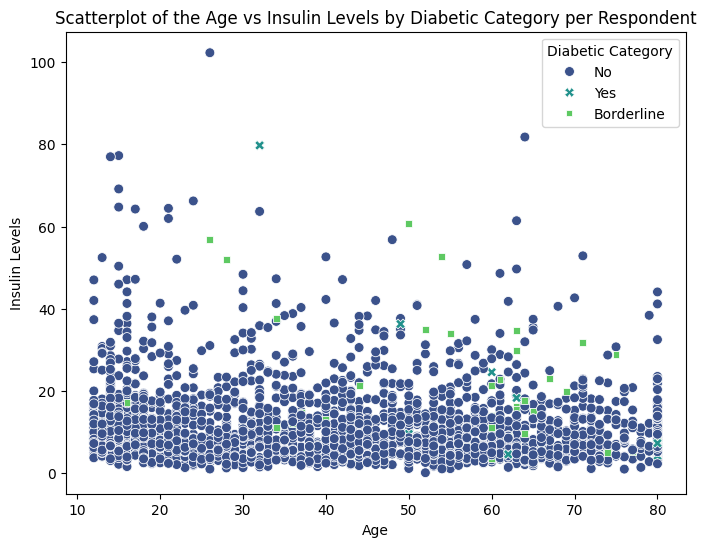

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plotting glucose levels vs. insulin levels
data = df


# scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data,
    x='AGE',
    y='BLOOD INSULIN LEVEL',
    hue='diabetes_copy',
    palette='viridis',
    style='diabetes_copy',
    s=50
    )

# labels and title
plt.title('Scatterplot of the Age vs Insulin Levels by Diabetic Category per Respondent')
plt.xlabel('Age')
plt.ylabel('Insulin Levels')

# enjoy the show!
plt.legend(title='Diabetic Category')
plt.show()

The data is very well distributed across ages! Though borderline cases are spread throughout the scatterplot, most diabetic cases shown are in the 40+ age group. There is a suggestion of an inverse correleation between high insulin levels and age but more analysis would be needed.

#scikit-learn Linear Regression

**Linear Regression - does BMI influence Blood Insulin Levels?**

In [ ]:
data = pd.read_csv('NHANES_age_prediction.csv')

# Define x and y
X = data[['BMXBMI']] # BMI
y = data['LBXIN'] # Blood Insulin levels

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
coefficients

Mean Squared Error: 63.3964094838634
R-squared: 0.3154988200957901


,Feature,Coefficient
0,BMXBMI,0.732503


We are not sure if a MSE of 63.40 is high for this type of data. The R-squared of 0.3155 means less than 32% of the variability in blood insulin can be explained by BMI.

#Histogram of residuals and Guassian distribution check

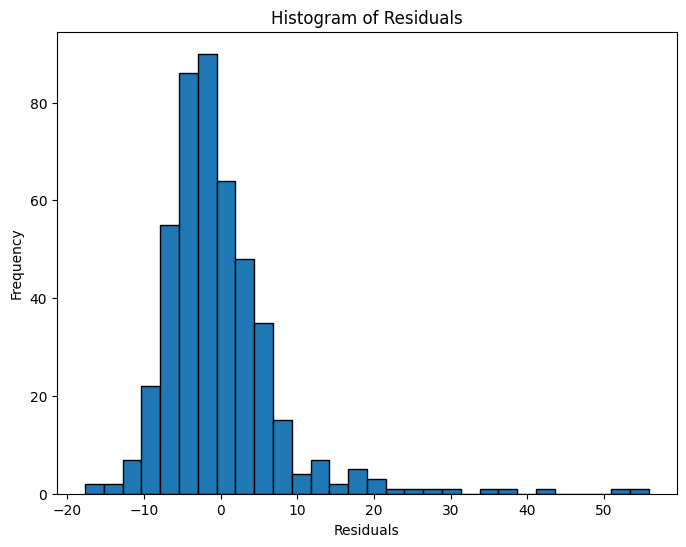

<Figure size 800x600 with 0 Axes>

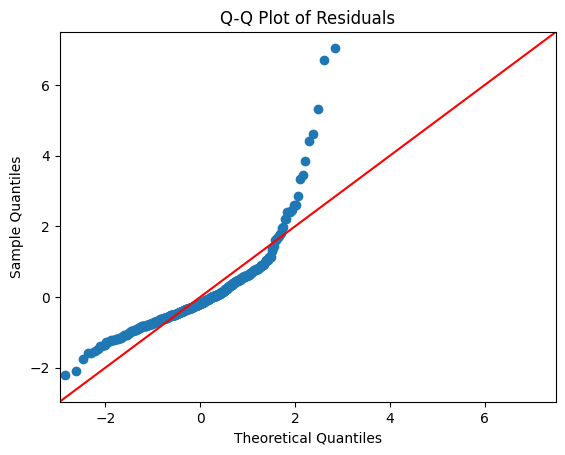

In [ ]:

residuals = y_test - y_pred

# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Check for Gaussian distribution (Q-Q plot)
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(8, 6))
qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()




Guassian distribution verdict: not really.

The quite skewed histogram and non-linear Q-Q plot suggest logistic regression may be a better model for the data.  

#Scatterplot and homoscedasticity

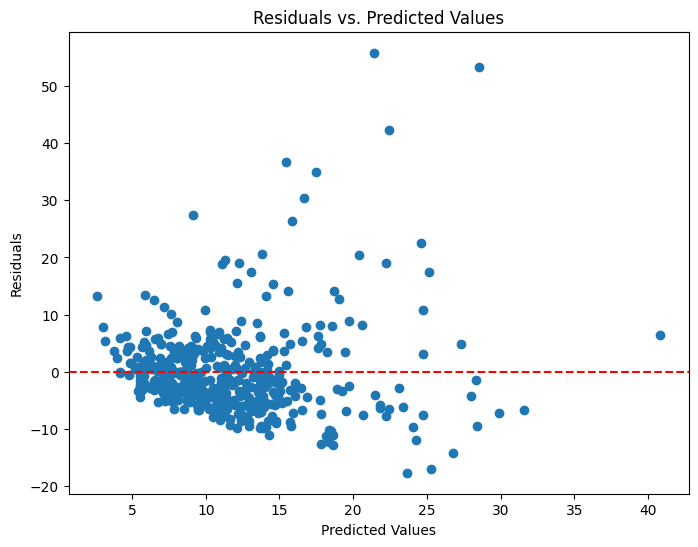

In [ ]:
# Scatterplot of predicted values vs. residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0
plt.show()


Our scatterplot is funnel/cornucopia shaped suggesting our model is better at predicting some parts of the data vs others.

#Coefficient Interpretations

In [ ]:
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
coefficients

,Feature,Coefficient
0,BMXBMI,0.732503


The coefficient of the estimated change in the blood insulin level for a one-unit increase in BMI (assuming the other factors remain constant) is 0.732503. While there is a positive relationship between BMI and blood insulin levels, our r-squared of 0.31549 suggests we should look at other factors to predict blood insulin levels.

# Went on a tangent

A group member had a suspicion that the diabetic values and age may be skewing the data.

In [ ]:
# Define x and y (from dataset)
X = data[['BMXBMI', 'DIQ010', 'RIDAGEYR']] # BMI, Diabetic or not, Age
y = data['LBXIN'] # Blood Insulin levels

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 58.46984482339649
R-squared: 0.3686917272401976


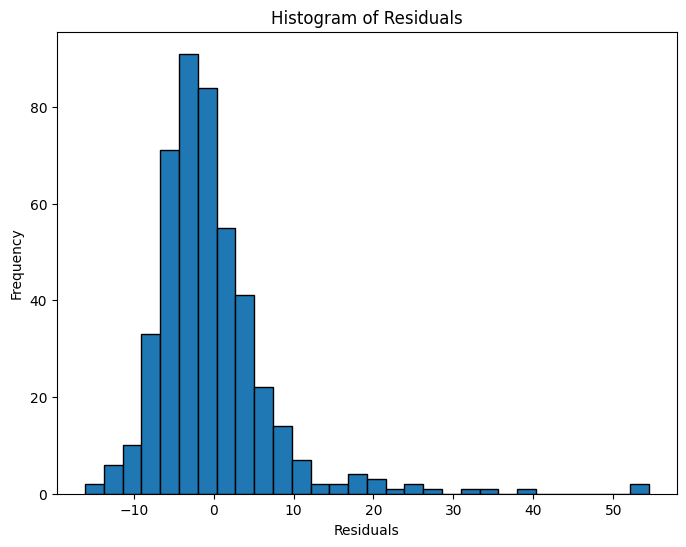

<Figure size 800x600 with 0 Axes>

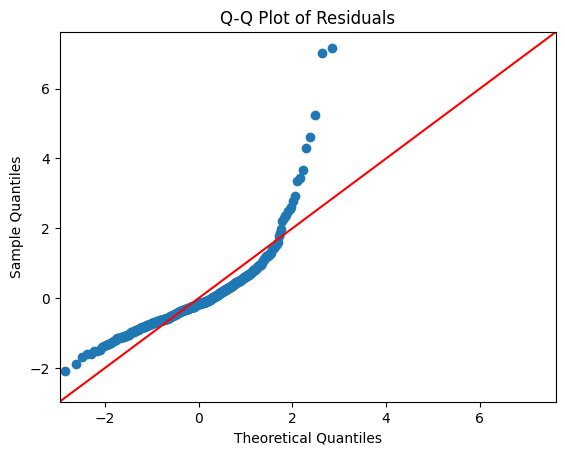

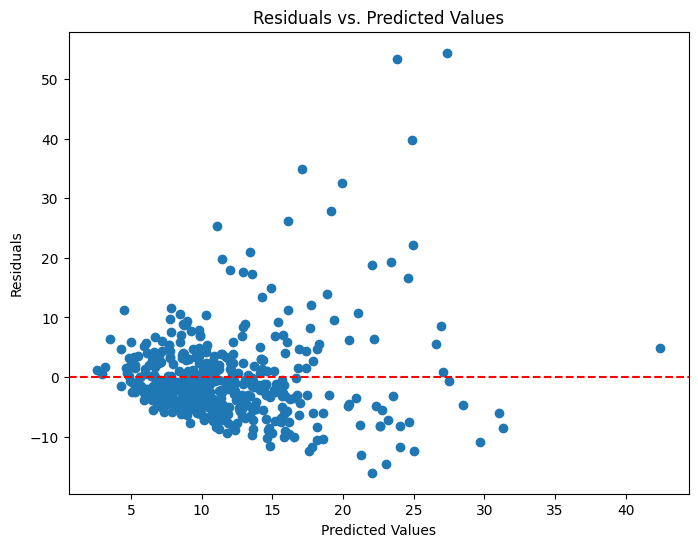

,Feature,Coefficient
0,BMXBMI,0.758296
1,DIQ010,1.957478
2,RIDAGEYR,-0.078880


In [ ]:
residuals = y_test - y_pred

# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Check for Gaussian distribution (Q-Q plot)
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(8, 6))
qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Scatterplot of predicted values vs. residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0
plt.show()


coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
coefficients


This did not change any of the characteristics of the model at first glance, but analysis shows that it did improve the model slightly. The Guassian histogram is not as smooth and still right-skewed. The scatterplot of predicted vs real values is still funnel-shaped. The MSE decreased and the R-value increased indicating that the model was improved, though the r-squared value of 36.8 indicates that there is still a lot of variance that the model does not explain. The negative correlation between blood insulin and age speculated upon in EDA 2 is borne out here.
